In [1]:
import sklearn
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("amazon_baby.csv")

In [3]:
data

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


In [4]:
data.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183531 entries, 0 to 183530
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    183213 non-null  object
 1   review  182702 non-null  object
 2   rating  183531 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.2+ MB


In [6]:
data.describe()

,rating
count,183531.000000
mean,4.120448
std,1.285017
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


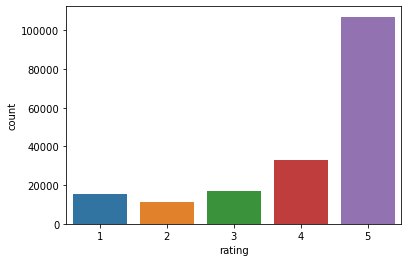

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = sns.countplot(x='rating', data=data)

In [8]:
def remove_punctuation(text):
    import string
    return text.translate(text.maketrans('','',string.punctuation))

data = data.fillna({'review':''})
data['review_clean'] = data['review'].apply(remove_punctuation)
data

,name,review,rating,review_clean
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,These flannel wipes are OK but in my opinion n...
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was not disappointed i love ...
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,Very soft and comfortable and warmer than it l...
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,This is a product well worth the purchase I h...
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,All of my kids have cried nonstop when I tried...
...,...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5,Such a great idea very handy to have and look ...
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5,This product rocks It is a great blend of fun...
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5,This item looks great and cool for my kidsI kn...
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5,I am extremely happy with this product I have ...


In [9]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183213 entries, 0 to 183212
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   name          183213 non-null  object
 1   review        183213 non-null  object
 2   rating        183213 non-null  int64 
 3   review_clean  183213 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.6+ MB


In [10]:
data = data[data['rating'] != 3]
data.reset_index(drop=True, inplace=True)
data = data[data["review_clean"] != '']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165678 entries, 0 to 166455
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   name          165678 non-null  object
 1   review        165678 non-null  object
 2   rating        165678 non-null  int64 
 3   review_clean  165678 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.3+ MB


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

def dictionarize(row):
    cv = CountVectorizer(
        analyzer = "word"
    )
    try:
        text = [row.loc['review_clean']]
        cv_fit=cv.fit_transform(text)    
        word_list = cv.get_feature_names()
        count_list = cv_fit.toarray().sum(axis=0)
        dictionary = dict(zip(word_list,count_list))
        row['word_count'] = dictionary
        return row
    except:
        return row
        

data = data.apply(dictionarize, axis=1)

In [12]:
data.head()

,name,rating,review,review_clean,word_count
0,Planetwise Wipe Pouch,5,it came early and was not disappointed. i love...,it came early and was not disappointed i love ...,"{'and': 3, 'bags': 1, 'came': 1, 'disappointed..."
1,Annas Dream Full Quilt with 2 Shams,5,Very soft and comfortable and warmer than it l...,Very soft and comfortable and warmer than it l...,"{'and': 2, 'anyone': 1, 'bed': 1, 'comfortable..."
2,Stop Pacifier Sucking without tears with Thumb...,5,This is a product well worth the purchase. I ...,This is a product well worth the purchase I h...,"{'about': 1, 'and': 3, 'anything': 1, 'approac..."
3,Stop Pacifier Sucking without tears with Thumb...,5,All of my kids have cried non-stop when I trie...,All of my kids have cried nonstop when I tried...,"{'all': 2, 'allow': 1, 'an': 1, 'and': 2, 'bin..."
4,Stop Pacifier Sucking without tears with Thumb...,5,"When the Binky Fairy came to our house, we did...",When the Binky Fairy came to our house we didn...,"{'about': 2, 'adorable': 1, 'and': 2, 'any': 2..."


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165678 entries, 0 to 166455
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   name          165678 non-null  object
 1   rating        165678 non-null  int64 
 2   review        165678 non-null  object
 3   review_clean  165678 non-null  object
 4   word_count    165676 non-null  object
dtypes: int64(1), object(4)
memory usage: 7.6+ MB


In [14]:
data['sentiment'] = data['rating'].apply(lambda rating : +1 if rating > 3 else 0)

In [15]:
data.head()

,name,rating,review,review_clean,word_count,sentiment
0,Planetwise Wipe Pouch,5,it came early and was not disappointed. i love...,it came early and was not disappointed i love ...,"{'and': 3, 'bags': 1, 'came': 1, 'disappointed...",1
1,Annas Dream Full Quilt with 2 Shams,5,Very soft and comfortable and warmer than it l...,Very soft and comfortable and warmer than it l...,"{'and': 2, 'anyone': 1, 'bed': 1, 'comfortable...",1
2,Stop Pacifier Sucking without tears with Thumb...,5,This is a product well worth the purchase. I ...,This is a product well worth the purchase I h...,"{'about': 1, 'and': 3, 'anything': 1, 'approac...",1
3,Stop Pacifier Sucking without tears with Thumb...,5,All of my kids have cried non-stop when I trie...,All of my kids have cried nonstop when I tried...,"{'all': 2, 'allow': 1, 'an': 1, 'and': 2, 'bin...",1
4,Stop Pacifier Sucking without tears with Thumb...,5,"When the Binky Fairy came to our house, we did...",When the Binky Fairy came to our house we didn...,"{'about': 2, 'adorable': 1, 'and': 2, 'any': 2...",1


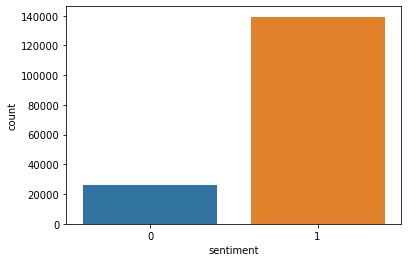

In [16]:
fig = sns.countplot(x='sentiment', data=data)

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=1)

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from scipy import sparse
'''
class GD_Classifier(BaseEstimator, ClassifierMixin):
    def __init__(self, eta0=0.01, max_iterations=500):
        self.theta_ = np.zeros(shape=(1,))
        self.eta = eta0
        self.max_iterations = max_iterations
    
    def fit(self, X, y):
        y = np.ravel(np.array(y))
        self.classes_ = np.unique(y)
        X, y = check_X_y(X, y, accept_sparse='csr')
        m = X.shape[0]
        if sparse.isspmatrix(X):
            X_b = sparse.hstack((np.ones((m, 1)),X))
        else:
            X_b = np.c_[np.ones((m, 1)), X]
        self.theta_ = np.zeros(shape=X_b.shape[1])
        for i in range(self.max_iterations):
            gradients = 1/m * X_b.T.dot(self.sigmoid(X_b.dot(self.theta_)) - y)
            self.theta_ = self.theta_ - self.eta * gradients
        return self
    
    def sigmoid(self, X):
        return 1/(1 + np.exp(-X))
    
    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X, accept_sparse='csr')
        m = X.shape[0]
        if sparse.isspmatrix(X):
            X_b = sparse.hstack((np.ones((m, 1)),X))
        else:
            X_b = np.c_[np.ones((m, 1)), X]
        probs = self.sigmoid(X_b.dot(self.theta_))
        return np.where(probs > 0.5, 1, 0) 
    
    def predict_proba(self, X):
        check_is_fitted(self)
        X = check_array(X, accept_sparse='csr')
        m = X.shape[0]
        if sparse.isspmatrix(X):
            X_b = sparse.hstack((np.ones((m, 1)),X))
        else:
            X_b = np.c_[np.ones((m, 1)), X]
        return self.sigmoid(X_b.dot(self.theta_))
    
    def get_params(self, deep=True):
        result = {}
        for i in range(self.theta_.shape[0]):
            name = 'theta_'+str(i)
            result[name] = self.theta_[i]
        return result
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def get_accuracy(self, X, y):
        X = np.array(X)
        y = np.ravel(np.array(y))
        predictions = self.predict(X)
        correct = sum(predictions==y)
        return correct/len(true_labels)
'''
class GD_Classifier(BaseEstimator, RegressorMixin):
    def __init__(self, eta0=0.01, max_iterations=500):
        self.theta_ = np.zeros(shape=(1,))
        self.eta = eta0
        self.max_iterations = max_iterations

    def fit(self, X, y):
        y = np.ravel(np.array(y))
        X, y = check_X_y(X, y, accept_sparse='csr')
        m = X.shape[0]
        if sparse.isspmatrix(X):
            X_b = sparse.hstack((np.ones((m, 1)),X))
        else:
            X_b = np.c_[np.ones((m, 1)), X]
        self.theta_ = np.zeros(shape=X_b.shape[1])
        for i in range(self.max_iterations):
            gradients = 1/m * X_b.T.dot(self.Sigmoid(X_b.dot(self.theta_)) - y)
            self.theta_ = self.theta_ - self.eta * gradients
        return self
    
    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X, accept_sparse='csr')
        m = X.shape[0]
        if sparse.isspmatrix(X):
            X_b = sparse.hstack((np.ones((m, 1)),X))
        else:
            X_b = np.c_[np.ones((m, 1)), X]
        probas = self.Sigmoid(X_b.dot(self.theta_))
        y_predicted = [1 if i > 0.5 else 0 for i in probas]
        return np.array(y_predicted)
    
    def predict_proba(self, X):
        check_is_fitted(self)
        X = check_array(X, accept_sparse='csr')
        m = X.shape[0]
        if sparse.isspmatrix(X):
            X_b = sparse.hstack((np.ones((m, 1)),X))
        else:
            X_b = np.c_[np.ones((m, 1)), X]
        return self.Sigmoid(X_b.dot(self.theta_))
    
    def get_params(self, deep=True):
        result = {}
        for i in range(self.theta_.shape[0]):
            name = 'theta_'+str(i)
            result[name] = self.theta_[i]
        return result
    
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def Sigmoid(self, z):
        return 1/(1 + np.exp(-z))

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=1)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer

sentiment_pipeline = Pipeline(
    [
        ('Count_Vectorizer', CountVectorizer()),
        ('TF-IDF', TfidfTransformer()),
        ('Logistic_Regression', GD_Classifier())
    ],
    verbose=True
)

from sklearn import set_config
set_config(display='diagram')
sentiment_pipeline

Pipeline(steps=[('Count_Vectorizer', CountVectorizer()),
                ('TF-IDF', TfidfTransformer()),
                ('Logistic_Regression', GD_Classifier(theta_0=0.0))],
         verbose=True)